In [29]:
#Modelo de Regresión Lineal

#Bibliotecas
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
import numpy as np

#Cargamos los datos
data = pd.read_csv('/Volumes/KINGSTON/Data Science Project/El-Ni-o-Southern-Oscillation-ENSO-Analysis-main/enso_2.csv')

#Acomodamos la columna "Month" a un formato numérico
data['Month'] = pd.to_datetime(data['Month'], format='%b').dt.month

#Tomamos las columnas relevantes para "X" y "y"
X = data[['Year', 'Month', 'Nino 3.4 SST', 'Nino 4 SST', 'TNI']]
y = data['Global Temperature Anomalies']

#Instancia al imputador reemplazando valores faltantes con la media
imputer = SimpleImputer(strategy='mean')
#Ajustamos el imputador a los datos, calcula la média de cada columa
#y reemplaza los valores faltantes por la media correspondiente
X = imputer.fit_transform(X)

#Calculamos las medias de las columnas a usar en "datos_prediccion"
nino_3_4_mean = np.nanmean(data['Nino 3.4 SST'])
nino_4_mean = np.nanmean(data['Nino 4 SST'])
tni_mean = np.nanmean(data['TNI'])

#Creamos el modelo de RL
model = LinearRegression()

#Lo entrenamos, incliumos los datos imputados
model.fit(X, y)

#Creamos un rango de fechas para las predicciones
fechas_prediccion = pd.date_range(start='2023-07-01', end='2025-12-01', freq='M')

#Debemos tener en datos_prediccion la misma longitud que predicciones
datos_prediccion = pd.DataFrame({
    'Year': [anio for anio in range(2023, 2026) for _ in range(12)],
    'Month': [mes for mes in range(1, 13) for _ in range(3)],
    'Nino 3.4 SST': [nino_3_4_mean] * 36,
    'Nino 4 SST': [nino_4_mean] * 36,
    'TNI': [tni_mean] * 36
})[:len(fechas_prediccion)]

#Predecimos
predicciones = pd.DataFrame({'Fecha': fechas_prediccion})
predicciones['Predicciones'] = model.predict(datos_prediccion)

#Resultados de la predicción
print(predicciones)

        Fecha  Predicciones
0  2023-07-31      1.001497
1  2023-08-31      1.001497
2  2023-09-30      1.001497
3  2023-10-31      0.994275
4  2023-11-30      0.994275
5  2023-12-31      0.994275
6  2024-01-31      0.987054
7  2024-02-29      0.987054
8  2024-03-31      0.987054
9  2024-04-30      0.979832
10 2024-05-31      0.979832
11 2024-06-30      0.979832
12 2024-07-31      0.991546
13 2024-08-31      0.991546
14 2024-09-30      0.991546
15 2024-10-31      0.984324
16 2024-11-30      0.984324
17 2024-12-31      0.984324
18 2025-01-31      0.977103
19 2025-02-28      0.977103
20 2025-03-31      0.977103
21 2025-04-30      0.969881
22 2025-05-31      0.969881
23 2025-06-30      0.969881
24 2025-07-31      0.981595
25 2025-08-31      0.981595
26 2025-09-30      0.981595
27 2025-10-31      0.974373
28 2025-11-30      0.974373


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/valid

In [23]:
#Evaluamos el modelo

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

#Creamos un DataFrame solo para las predicciones
predicciones = pd.DataFrame({'Fecha': fechas_prediccion})

#Dividimos los datos en 2, una parte de entrenamiento y prueba
X = data[['Nino 3.4 SST', 'Nino 4 SST', 'TNI']]
y = data['Global Temperature Anomalies']  #La temperatura global es la variable objetivo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Creamos el modelo de Regresión Lineal
model = LinearRegression()

#Entrenamos
model.fit(X_train, y_train)

#Predecimos con los datos de prueba
y_pred = model.predict(X_test)

#Calculamos las medidas a evaluar e imprimimos
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.07284466191850675
R-squared: -0.009821310475459422


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/valid

In [31]:
#Modelo alterno

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
import numpy as np

data = pd.read_csv('/Volumes/KINGSTON/Data Science Project/El-Ni-o-Southern-Oscillation-ENSO-Analysis-main/enso_2.csv')

data['Month'] = pd.to_datetime(data['Month'], format='%b').dt.month

X = data[['Year', 'Month', 'Nino 3.4 SST', 'Nino 4 SST', 'TNI']]
y = data['Global Temperature Anomalies']

imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

nino_3_4_mean = np.nanmean(data['Nino 3.4 SST'])
nino_4_mean = np.nanmean(data['Nino 4 SST'])
tni_mean = np.nanmean(data['TNI'])

model = LinearRegression()

model.fit(X, y)

fechas_prediccion = pd.date_range(start='2023-07-01', end='2025-12-01', freq='M')

datos_prediccion = pd.DataFrame({
    'Year': [anio for anio in range(2023, 2026) for _ in range(12)],
    'Month': [mes for mes in range(1, 13) for _ in range(3)],
    'Nino 3.4 SST': [nino_3_4_mean] * 36,
    'Nino 4 SST': [nino_4_mean] * 36,
    'TNI': [tni_mean] * 36
})[:len(fechas_prediccion)]

predicciones = pd.DataFrame({'Fecha': fechas_prediccion})
predicciones['Predicciones'] = model.predict(datos_prediccion)
print(predicciones)

        Fecha  Predicciones
0  2023-07-31      1.001497
1  2023-08-31      1.001497
2  2023-09-30      1.001497
3  2023-10-31      0.994275
4  2023-11-30      0.994275
5  2023-12-31      0.994275
6  2024-01-31      0.987054
7  2024-02-29      0.987054
8  2024-03-31      0.987054
9  2024-04-30      0.979832
10 2024-05-31      0.979832
11 2024-06-30      0.979832
12 2024-07-31      0.991546
13 2024-08-31      0.991546
14 2024-09-30      0.991546
15 2024-10-31      0.984324
16 2024-11-30      0.984324
17 2024-12-31      0.984324
18 2025-01-31      0.977103
19 2025-02-28      0.977103
20 2025-03-31      0.977103
21 2025-04-30      0.969881
22 2025-05-31      0.969881
23 2025-06-30      0.969881
24 2025-07-31      0.981595
25 2025-08-31      0.981595
26 2025-09-30      0.981595
27 2025-10-31      0.974373
28 2025-11-30      0.974373


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/valid

Mean Squared Error: 0.014585255138151334
Root Mean Squared Error: 0.12076942965068327


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/valid

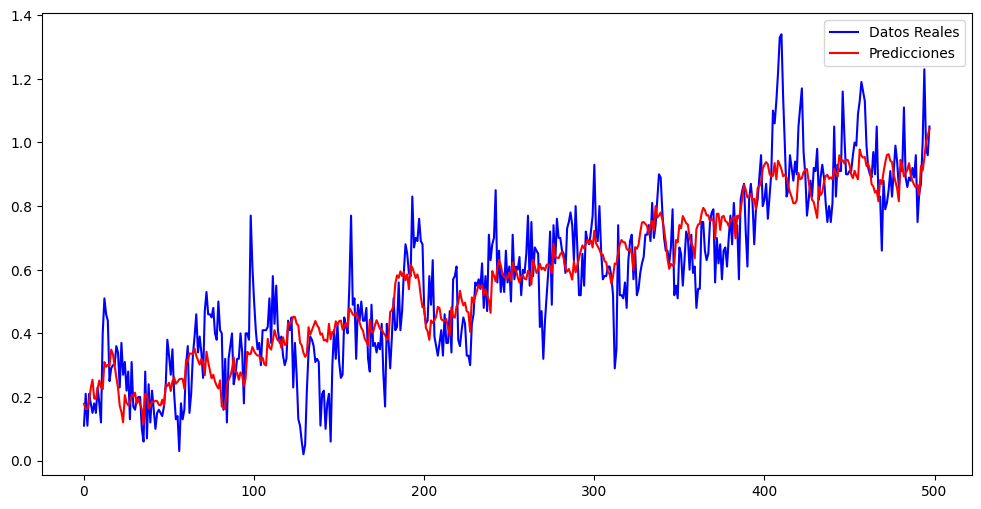

In [32]:
#Evaluamos el modelo

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt

data = pd.read_csv('/Volumes/KINGSTON/Data Science Project/El-Ni-o-Southern-Oscillation-ENSO-Analysis-main/enso_2.csv')

data['Month'] = pd.to_datetime(data['Month'], format='%b').dt.month

X = data[['Year', 'Month', 'Nino 3.4 SST', 'Nino 4 SST', 'TNI']]
y = data['Global Temperature Anomalies']

model = LinearRegression()

model.fit(X, y)

predictions = model.predict(X)

mse = mean_squared_error(y, predictions)
rmse = sqrt(mse)
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

plt.figure(figsize=(12, 6))
plt.plot(data.index, y, label='Datos Reales', color='b')
plt.plot(data.index, predictions, label='Predicciones', color='r')
plt.legend(loc='best')
plt.show()

Si bien los resultados de este modelo alterno son mejores, siguen siendo bajos.

# Modelo SARIMAX

In [10]:
#Modelo SARIMAX

#Bibliotecas
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX

#Cargamos los datos
data = pd.read_csv('/Volumes/KINGSTON/Data Science Project/El-Ni-o-Southern-Oscillation-ENSO-Analysis-main/enso_2.csv')

#Acomodamos la columna "Month" a un formato numérico
data['Month'] = pd.to_datetime(data['Month'], format='%b').dt.month

#Tomamos las columnas relevantes para "X" y "y"
y = data['Global Temperature Anomalies']

#Creamos el modelo SARIMA
model = SARIMAX(y, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))

#Lo entrenamos
results = model.fit(disp=False)

#Creamos un rango de fechas para las predicciones
fechas_prediccion = pd.date_range(start='2023-07-01', end='2026-01-01', freq='M')

#Predecimos
predicciones = results.get_prediction(start=0, end=len(y) + len(fechas_prediccion) - 1, dynamic=False)
predicciones_mean = predicciones.predicted_mean

#Creamos un DataFrame con las fechas y las predicciones
predicciones_df = pd.DataFrame({'Fecha': fechas_prediccion, 'Predicciones': predicciones_mean[-len(fechas_prediccion):]})

#Vemos las predicciones
print(predicciones_df)

#Guardamos las predicciones en un archivo
predicciones_df.to_csv('/Volumes/KINGSTON/Data Science Project/El-Ni-o-Southern-Oscillation-ENSO-Analysis-main/predicciones.csv')

         Fecha  Predicciones
498 2023-07-31      0.990566
499 2023-08-31      1.000260
500 2023-09-30      1.034057
501 2023-10-31      1.071158
502 2023-11-30      1.059270
503 2023-12-31      1.035976
504 2024-01-31      1.057812
505 2024-02-29      1.065980
506 2024-03-31      1.167645
507 2024-04-30      1.076925
508 2024-05-31      1.030755
509 2024-06-30      1.010006
510 2024-07-31      1.004601
511 2024-08-31      1.021856
512 2024-09-30      1.052867
513 2024-10-31      1.091834
514 2024-11-30      1.069189
515 2024-12-31      1.052053
516 2025-01-31      1.074332
517 2025-02-28      1.089122
518 2025-03-31      1.197761
519 2025-04-30      1.098385
520 2025-05-31      1.053637
521 2025-06-30      1.038907
522 2025-07-31      1.030565
523 2025-08-31      1.047410
524 2025-09-30      1.078572
525 2025-10-31      1.117438
526 2025-11-30      1.095378
527 2025-12-31      1.077906


<Figure size 1200x600 with 0 Axes>

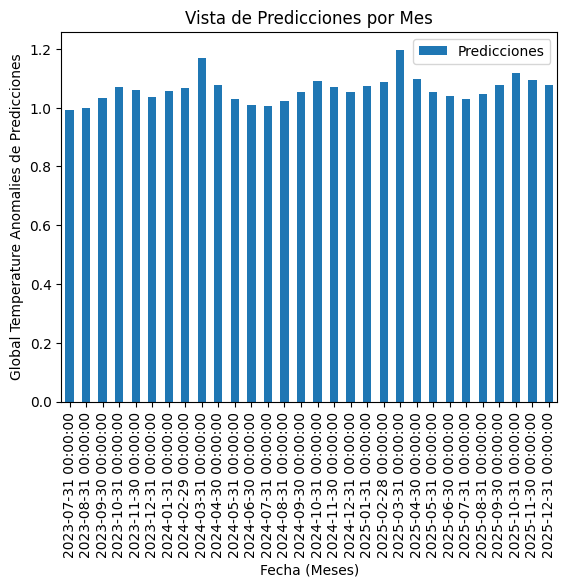

<Figure size 1200x600 with 0 Axes>

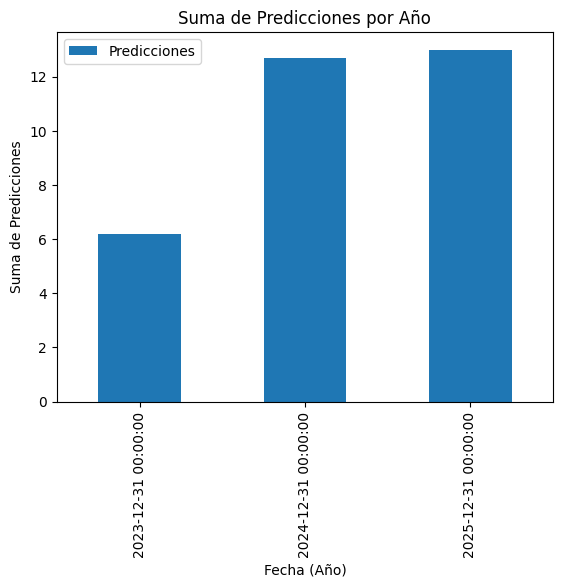

In [33]:
#Graficamos el modelo SARIMAX

import pandas as pd
import matplotlib.pyplot as plt

#Cargamos los datos
predicciones_df = pd.read_csv('/Volumes/KINGSTON/Data Science Project/El-Ni-o-Southern-Oscillation-ENSO-Analysis-main/predicciones.csv')
predicciones_df['Fecha'] = pd.to_datetime(predicciones_df['Fecha'])
predicciones_df.set_index('Fecha', inplace=True)

#Graficsmos por mes
plt.figure(figsize=(12, 6))
predicciones_df.resample('M').sum().plot(y='Predicciones', kind='bar')
plt.xlabel('Fecha (Meses)')
plt.ylabel('Global Temperature Anomalies de Predicciones')
plt.title('Vista de Predicciones por Mes')
plt.show()

#Graficamos por año
plt.figure(figsize=(12, 6))
predicciones_df.resample('Y').sum().plot(y='Predicciones', kind='bar')
plt.xlabel('Fecha (Año)')
plt.ylabel('Suma de Predicciones')
plt.title('Suma de Predicciones por Año')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is depreca

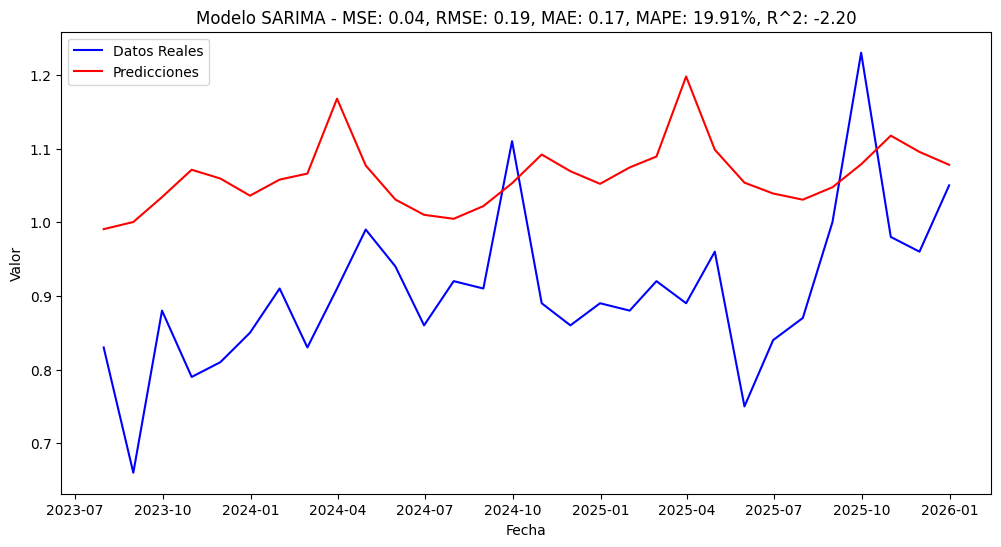

MSE: 0.04
RMSE: 0.19
MAE: 0.17
MAPE: 19.91%
R^2: -2.20


In [7]:
#Evaluamos el modelo

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
import numpy as np
import matplotlib.pyplot as plt

#Extraemos para comparar las prediccones vs valores reales
datos_reales = y[-len(fechas_prediccion):]

#Predecimos
predicciones = predicciones_df['Predicciones']

#Calculamos el Error Cuadrático Medio (MSE)
mse = mean_squared_error(datos_reales, predicciones)

#Calculamos la Raíz del Error Cuadrático Medio (RMSE)
rmse = np.sqrt(mse)

#Calculamos el Error Absoluto Medio (MAE)
mae = mean_absolute_error(datos_reales, predicciones)

#Calculamos el Error Absoluto Medio Porcentual (MAPE)
mape = mean_absolute_percentage_error(datos_reales, predicciones)

#Calculamosel Coeficiente de Determinación (R^2)
r2 = r2_score(datos_reales, predicciones)

#Graficamos las predicciones y los datos reales
plt.figure(figsize=(12, 6))
plt.plot(fechas_prediccion, datos_reales, label='Datos Reales', color='b')
plt.plot(fechas_prediccion, predicciones, label='Predicciones', color='r')
plt.title(f'Modelo SARIMA - MSE: {mse:.2f}, RMSE: {rmse:.2f}, MAE: {mae:.2f}, MAPE: {mape:.2%}, R^2: {r2:.2f}')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()
plt.show()

#Vemos los resultados
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'MAPE: {mape:.2%}')
print(f'R^2: {r2:.2f}')